# Lesson 2 - Core Python Libraries for Data Science

## Activity 1. NumPy for Numerical Computations

**NumPy** is the powerhouse for numerical operations in Python. It enables fast and efficient array manipulation and mathematical operations, much like a high-performance engine in a sports car.

**Particular Applications:** <br>
> **Scientific Computing:** Used for simulations in physics and engineering. <br>
> **Data Aggregation:** Helps in calculating statistics, summations, or aggregating large datasets.

In [2]:
import numpy as np

# Create a sample array
data = np.array([1, 2, 3, 4, 5])
print("Original Array:", data)

# Reshape into a 2x3 array (adding one more element for illustration)
data_matrix = np.arange(1, 7).reshape(2, 3)
print("2x3 Matrix:\n", data_matrix)

# Matrix multiplication example:
matrix_a = np.array([[1, 2], [3, 4]])
matrix_b = np.array([[2, 0], [1, 2]])
result = np.dot(matrix_a, matrix_b)
print("Matrix Multiplication Result:\n", result)


Original Array: [1 2 3 4 5]
2x3 Matrix:
 [[1 2 3]
 [4 5 6]]
Matrix Multiplication Result:
 [[ 4  4]
 [10  8]]


## Activity 2: Pandas for Structured Data Handling

**Pandas** revolutionizes how we work with tabular data. It introduces structured data types—DataFrames and Series—that allow for powerful data manipulation, cleaning, and transformation, similar to a well-organized office file system.

**Particular Applications:** <br>
> **Data Wrangling:** Loading, cleaning, and structuring data for analysis.
> **Data Transformation:** Merging multiple datasets, handling missing values, and formatting data for further tasks.

In [6]:
# Create a dummy sample_data.csv file for demonstration if it doesn't exist
import os
import pandas as pd

dummy_data_csv_path = 'sample_data.csv'

if not os.path.exists(dummy_data_csv_path):
    print(f"Creating a dummy '{dummy_data_csv_path}' file.")
    dummy_data = {'Category': ['A', 'B', 'A', 'C', 'B'],
                  'Sales': [100, 150, 110, 200, 160],
                  'Value': [10, 15, None, 20, 16]} # Include a None for fillna
    dummy_df_to_save = pd.DataFrame(dummy_data)
    dummy_df_to_save.to_csv(dummy_data_csv_path, index=False)

# Load a sample CSV into a DataFrame
# Now the dummy file should exist if the original was not found
try:
    df = pd.read_csv('sample_data.csv')
except FileNotFoundError:
    # This should ideally not happen if the dummy file creation worked
    print("Error: sample_data.csv not found even after attempting creation.")


# Inspecting the first few rows
print(df.head())

# Handling missing values
# Using method='ffill' requires sorting, or can use fillna(0) or mean()
# Let's use fillna(0) for simplicity or ensure 'Value' column exists
if 'Value' in df.columns:
    df.fillna(0, inplace=True) # Using 0 to fill missing values

# Grouping: Compute average sales by category
# Check if 'Category' and 'Sales' columns exist
if 'Category' in df.columns and 'Sales' in df.columns:
    avg_sales = df.groupby('Category')['Sales'].mean()
    print("Average Sales by Category:\n", avg_sales)
else:
    print("Cannot compute average sales by category: Required columns ('Category' or 'Sales') not found.")


  Category  Sales  Value
0        A    100   10.0
1        B    150   15.0
2        A    110    NaN
3        C    200   20.0
4        B    160   16.0
Average Sales by Category:
 Category
A    105.0
B    155.0
C    200.0
Name: Sales, dtype: float64


## Activity 3: Data Visualization with Matplotlib and Seaborn

**Matplotlib:** Provides the fundamental graphics foundation with extensive customization options.

**Seaborn:** Builds on matplotlib, offering high-level, aesthetically pleasing visualizations that are easier to interpret.

**Particular Applications:**

> **Trend Analysis:** Creating line charts to show patterns over time. <br>
> **Comparative Studies:** Crafting bar charts, scatter plots, and heatmaps for identifying relationships. <br>
> **Storytelling:** Turning raw data into visual narratives that communicate findings effectively. <br>

Cannot plot Sales Over Time: Required columns ('Date' or 'Sales') not found in DataFrame.


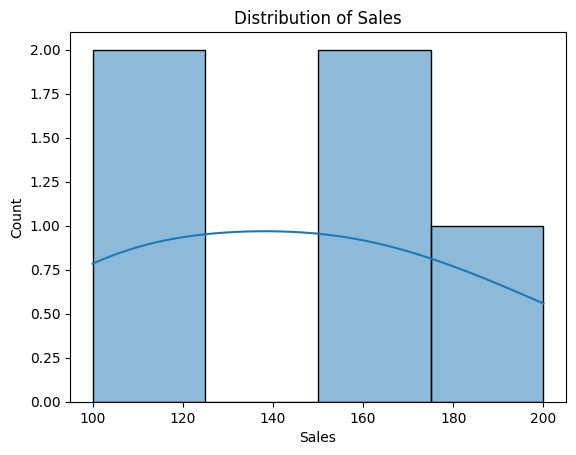

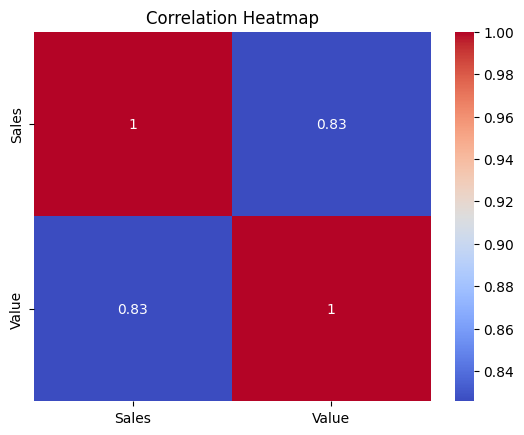

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np # Ensure numpy is imported

# Assuming df is already loaded from a previous cell

# Basic line plot using matplotlib
# Add a check for the 'Date' column before plotting
if 'Date' in df.columns and 'Sales' in df.columns:
    # Ensure the Date column is sorted for a meaningful time series plot
    try:
        df = df.sort_values('Date')
        plt.figure(figsize=(8,4))
        plt.plot(df['Date'], df['Sales'], marker='o')
        plt.title('Sales Over Time')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.xticks(rotation=45)
        plt.tight_layout() # Adjust layout to prevent labels overlapping
        plt.show()
    except Exception as e:
        print(f"An error occurred during plotting Sales Over Time: {e}")
else:
    print("Cannot plot Sales Over Time: Required columns ('Date' or 'Sales') not found in DataFrame.")


# Seaborn: Distribution and correlation heatmap
# Add a check for the 'Sales' column before plotting distribution
if 'Sales' in df.columns:
    sns.histplot(df['Sales'], kde=True)
    plt.title('Distribution of Sales')
    plt.show()
else:
     print("Cannot plot Distribution of Sales: 'Sales' column not found in DataFrame.")

# Check if there are numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
if not numeric_df.empty:
    try:
        corr = numeric_df.corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.title('Correlation Heatmap')
        plt.show()
    except Exception as e:
        print(f"An error occurred during plotting Correlation Heatmap: {e}")

else:
    print("Cannot plot Correlation Heatmap: No numeric columns found in DataFrame.")


## Activity 4: Introduction to Machine Learning with Scikit-learn

**Scikit-learn** is user-friendly and robust, offering a wide range of machine learning models and tools. It streamlines everything from data preprocessing to model evaluation and is the Swiss Army knife for machine learning in Python.

**Particular Applications:**

> **Predictive Modeling:** Building models for regression, classification, or clustering. <br>
> **Experimentation:** Quickly trying multiple algorithms and tuning parameters. <br>
> **Evaluation:** Assessing model performance through error metrics and cross-validation.


In [19]:
import pandas as pd

# Load your data into a pandas DataFrame
# Replace 'data.csv' with the actual path to your data file
try:
    df = pd.read_csv('sample_data.csv')
except FileNotFoundError:
    print("Error: data.csv not found. Please provide the correct path to your data file.")
    # You might want to exit or handle this error appropriately
    # For demonstration, let's create a dummy DataFrame if the file is not found
    import numpy as np
    print("Creating a dummy DataFrame for demonstration.")
    data = {'MarketingSpend': np.random.rand(100) * 1000,
            'Sales': np.random.rand(100) * 5000 + 1000}
    df = pd.DataFrame(data)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = df.dropna()
X = df[['Value']]
y = df['Sales']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
error = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", error)

Mean Squared Error: 0.0


## Activity 5: Introduction to NLP with NLTK, spaCy & Hugging Face Transformers

**NLTK:** Known for its comprehensive language processing and learning resources.

**spaCy:** Favored for its speed and advanced features in tagging and entity recognition.

**Hugging Face Transformers:** Offers cutting-edge, pre-trained models for deep learning tasks in NLP.

**Particular Applications:**

> **Text Preprocessing:** Tokenization, stop-word removal, and lemmatization. <br>
> **Entity Recognition:** Identifying names, locations, and organizations in texts. <br>
> **Sentiment Analysis:** Determining the sentiment behind social media posts, reviews, or any text data. <br>
> **Advanced Tasks:** Leveraging Transformer models for machine translation, summarization, or question answering.

In [23]:
# Sample code (Using spaCy):

import spacy

# Load the small English model for spaCy
nlp = spacy.load("en_core_web_sm")
text = "Apple is looking at buying U.K. startup for $1 billion."

# Process the text
doc = nlp(text)
print("Tokens:", [token.text for token in doc])
print("Entities:", [(ent.text, ent.label_) for ent in doc.ents])

Tokens: ['Apple', 'is', 'looking', 'at', 'buying', 'U.K.', 'startup', 'for', '$', '1', 'billion', '.']
Entities: [('Apple', 'ORG'), ('U.K.', 'GPE'), ('$1 billion', 'MONEY')]


In [25]:
# Sample code (Using Transformers):
from transformers import pipeline

# Specify a model and revision (example using the same default model)

model_name = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"

#DistilBERT is a lightweight, efficient version of BERT that understands English text without caring about uppercase or lowercase letters. It’s fine-tuned on the SST-2 dataset to quickly classify text as positive or negative sentiment.

revision = "714eb0f" # This is the revision mentioned in your output
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name, revision=revision)

result = sentiment_pipeline("I love the new features in this product!")
print("Sentiment Analysis Result:", result)


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\juliana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\juliana\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


Sentiment Analysis Result: [{'label': 'POSITIVE', 'score': 0.9998722076416016}]
